In [55]:
import pandas as pd
import numpy as np

train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test_2.csv')
train = train.interpolate(method='nearest').dropna()
test  = test.interpolate(method='nearest').fillna(0)

In [61]:
train_ft   = train.ix[:,  1: 26]
train_X    = train.ix[:, 26: 28]
train_ts_X = train.ix[:, 28:147]
train_ts_Y = train.ix[:,147:207]
train_Y1   = train.ix[:,    207]
train_Y2   = train.ix[:,    208]
train_WI   = train.ix[:,    209]
train_WD   = train.ix[:,    210]

test_ft    = test.ix[:,   1: 26]
test_X     = test.ix[:,  26: 28]
test_ts_X  = test.ix[:,  28:147]

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
def plot_ts(ts):
    plt.plot(np.array(ts))
    plt.ylabel('return')
    plt.show()

def plot_hist(a):
    plt.hist(a, bins=50, normed=True)
    plt.show()

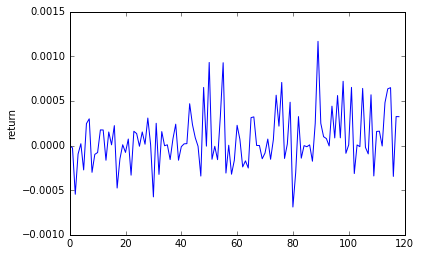

In [101]:
plot_ts(train_ts_X.ix[6,:])

In [161]:
sub = pd.read_csv('../data/sample_submission_2.csv')

In [167]:
from sklearn.neighbors import KNeighborsRegressor

# create an KNN model
def knn(X, y):
    m = KNeighborsRegressor(n_neighbors=50, weights='distance')
    m.fit(X, y)
    return m

In [168]:
m1 = knn(train_ft, train_Y1)
m2 = knn(train_ft, train_Y2)
test_Y1 = m1.predict(test_ft)
test_Y2 = m2.predict(test_ft)

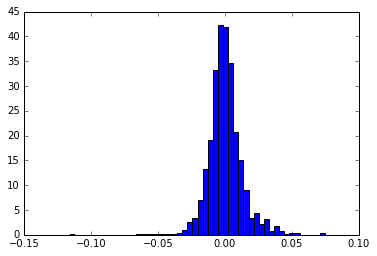

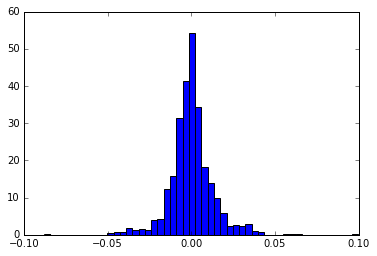

In [177]:
plot_hist(test_Y1)
plot_hist(test_Y2)

In [178]:
sub.loc[60::62,'Predicted'] = test_Y1
sub.loc[61::62,'Predicted'] = test_Y2

sub.to_csv('../data/my_sub.csv', index=False)